In [1]:
%matplotlib notebook 

import matplotlib.pyplot as plt
import numpy as np
from scipy.constants import c

from time import time

from axiprop.lib_af import PropagatorSymmetric, PropagatorResampling, PropagatorFFT2
from axiprop.utils import laser_from_fu, mirror_parabolic, get_temporal_1d
# from axiprop.utils_priv import 

In [2]:
lambda0 = 0.8e-6              # wavelength [m]
tau_fwhm = 35e-15             # FWHM duration (intensity) [s]
R_las = 10e-3                 # Radial size of laser [m]

tau = tau_fwhm / (2*np.log(2))**0.5
k0 = 2 * np.pi / lambda0

def fu_laser(kz, r):
    """
    Gaussian spot with the Gaussian temporal profile
    """
    profile_r = np.exp( -(r/R_las)**200 ) * (r<2.5*R_las)
    profile_kz = np.exp( -( (kz-k0) * c * tau / 2 )**2 )
    return profile_r * profile_kz

f_N = 1000                      # f-number of the parabolic mirror
f0 = 2 * R_las * f_N          # focal length

In [3]:
L_kz = 8 / (c*tau)               # full spectral width [1/s] 
Nkz = 16                          # number of kz modes (1 for quick demonstration)
w0 = 2/np.pi * lambda0 * f_N     # beam waist
L_R = np.pi * w0**2/lambda0      # Rayleigh length
dr = w0/2                        # estimate grid resolution

Lx = 5 * R_las               # total radius [m]
Ly = 5 * R_las               # total radius [m]
Nx = 1024*4
Ny = 1024*4

prop = PropagatorFFT2(Lx, Ly, L_kz, Nx ,Ny, Nkz, k0)

In [7]:
A0 = laser_from_fu( fu_laser, prop.kz, prop.r, normalize=True )
A0 /=  (R_las/w0) # normalise to the focussed amplitude
A0 = A0 * mirror_parabolic( f0, prop.kz, prop.r )

In [5]:
A0 = prop.step(A0, f0)

<IPython.core.display.Javascript object>


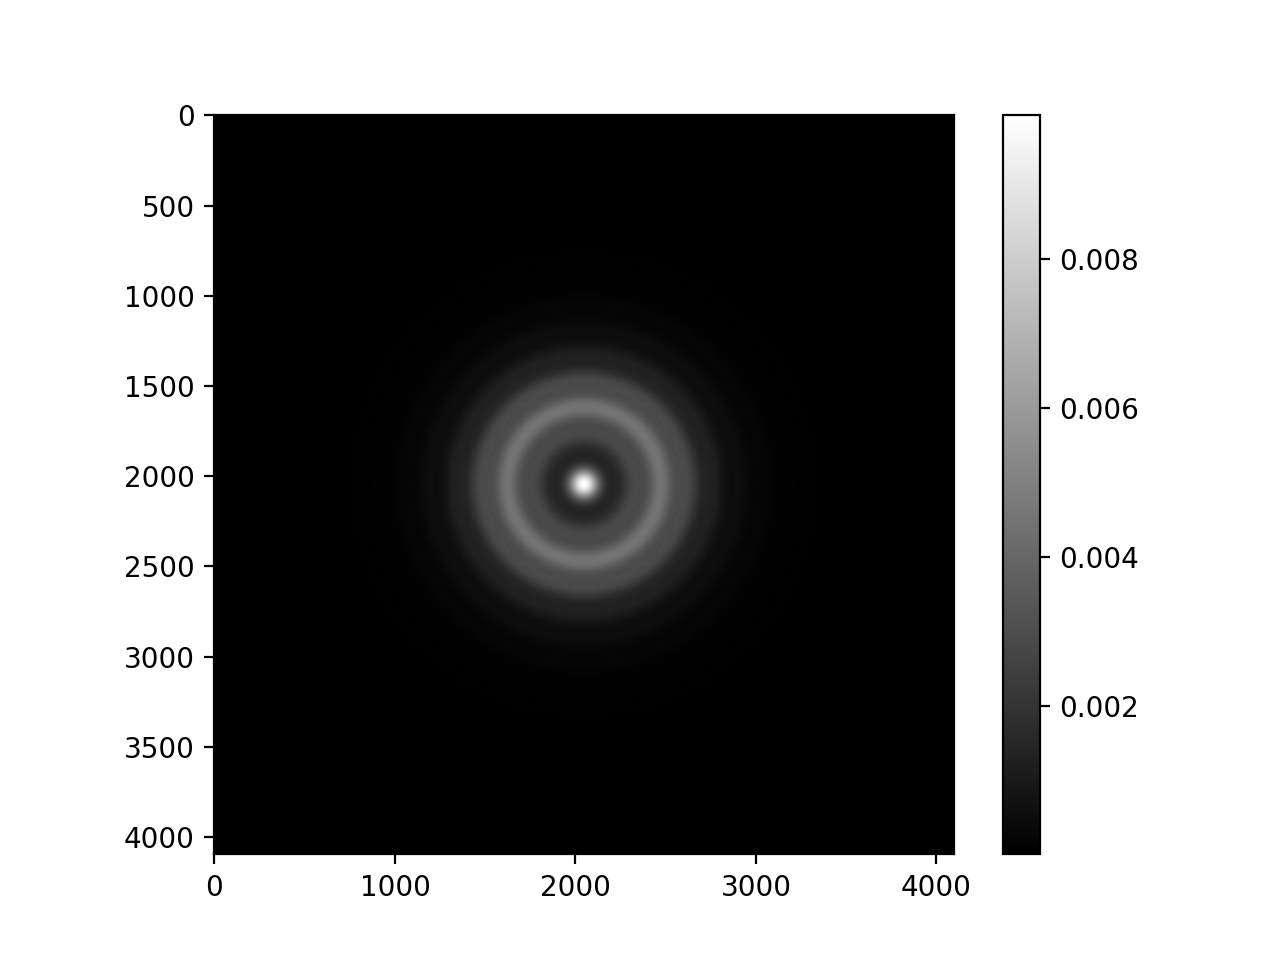

In [6]:
plt.figure()
    
plt.imshow(np.abs( A0**2 ).sum(0).reshape(prop.Nx, prop.Ny),
           cmap=plt.cm.gray)

plt.colorbar()